# Tutorial 9a - Bulk elastic anisotropy

Although much of the SBS literature assumes that the elastic materials are isotropic, anisotropy of the elastic response can be an important effect. In general, anisotropy is often more significant in elastic physics than electromagnetic physics, because of the more involved tensor nature of the elastic theory. For instance, *cubic* materials such as silicon have an isotropic linear electromagnetic response but an anisotropic elastic linear response.

NumBAT supports arbitrary elastic nonlinearity in calculating elastic modes and the SBS gain of a waveguide. However, even the bulk elastic wave properties of anistropic materials is quite complex. This tutorial explores some of these effects. 

This exercise is most naturally performed interactively and so this example is written as a Jupyter notebook (see Tutorial 9 for an introduction to NumBAT in Jupyter).

## Theory

Bulk wave modes in linear elastic materials are found as eigen-solutions of the elastic wave equation for a uniform material.  
Starting from the elastic wave equation
$$
\nabla \cdot \bar{T} + \omega^2 \rho(x,y) \vec U = 0,
$$
using the constitutive equation
$$
\bar{T} = \bar{c} : \bar{S} \qquad \leftrightarrow \qquad T_{ij} = c_{ijkl} S_{kl},
$$
where $\bar{c}$ is the stiffness tensor and $\bar{S}$ the strain tensor, we find
\begin{align*}
\nabla \cdot (\bar{c} : \bar{S}) + \omega^2 \rho(x,y) \vec U &= 0 \\
\nabla \cdot (\bar{c} : \nabla_s \vec{U}) + \omega^2 \rho(x,y) \vec U &= 0 ,
\end{align*}
where $\nabla_S$ denotes the *symmetric gradient*.

## Bulk wave modes

Looking for plane wave solutions of the form
$$
  \vec U =  \vec u e^{i (\vec q \cdot \vec r -\Omega t) } +  \vec u^* e^{-i (\vec q \cdot \vec r -\Omega t) } ,
$$
leads to the 3x3 matrix eigenvalue equation (see Auld. vol 1, chapter 7)
$$
k^2 \Gamma \vec u = \rho \Omega^2 \vec u 
$$
or in index form
$$ 
k^2 \Gamma_{ij} - \rho \Omega^2 \delta_{ij} u_j = 0.
$$
known as the *Christoffel* equation.

The matrix operator $\Gamma$ is most conveniently written using the compact Voigt notation as follows. Writing the wavevector $\vec k= k \hat \kappa$ in terms of the unit vector $\hat \kappa$, we define the matrix
$$
\mathrm{M}=
\begin{bmatrix}
\kappa_x & 0 & 0 & 0 & \kappa_z & \kappa_y \\
0 & \kappa_y & 0 &  \kappa_z & 0 & \kappa_x \\
 0 & 0 & \kappa_z & \kappa_y & \kappa_x & 0 .
\end{bmatrix}
$$
Then $\Gamma$ has the form
$$
\Gamma(\vec \kappa) = \mathrm{M} C_{IJ} \mathrm{M}^t,
$$
where $C_{IJ}$ is the 6x6 Voigt matrix for the stiffness tensor.

Since the stiffness is invariably treated as frequency independent, we can rewrite the Christoffel equation as 
$$ 
\left( \frac{1}{\rho} \Gamma_{ij} - \frac{\Omega^2}{k^2} \delta_{ij} \right) u_j = 0,
$$
and identify the eigenvalue as the square of the phase speed $v = \Omega/k$:
$$ 
\left( \frac{1}{\rho} \Gamma_{ij}(\vec \kappa) - v^2 \delta_{ij} \right) u_j = 0.
$$

If we neglect the viscosity, $\Gamma$ is a real symmetric matrix, so we are guaranteed to find three propagating wave modes with 
real phase velocities $v_i$ and orthogonal polarisation vectors $\vec u_i$.


In isotropic materials, the Christoffel equation has the expected solutions of one longitudinal wave, and two slower shear waves.
In anisotropic materials, the polarisations can be more complicated. However, as $\Gamma$ is a symmetric matrix, 
the three wave modes are always orthogonal.

## Group velocity
Continuing to neglect any linear wave damping, we can identify the *group velocity*
$$
\vec v_g \equiv \nabla_{\vec k}  \Omega,
$$
with the *energy velocity* $\vec v_e$, defined as the ratio of the power flux and the energy density:
$$
\vec v_g \equiv \frac{P_e}{u_e}  = \frac{- \frac{1}{2}\vec v \cdot \bar {T}}{\bar{S} : \bar{C} : \bar{S}}.
$$

In this way, we can find both the phase velocity and group velocity as functions of the wavevector direction $\vec \kappa$.
In the (excellent) dispersionless approximation, these are independent of the wave frequency $\Omega$. (This of course is *not* true in waveguides.)


## Wave surfaces

It is common to plot several quantities
* the *slowness surface*, which is the reciprocal of the wave speed $\frac{1}{v_p(\vec \kappa)}$
* the *normal* or *phase velocity* surface, which is simply the wave speed function $v_p(\vec \kappa)$
* the *ray surface*, which is the magnitude of the group velocity $|\vec v_g(\vec \kappa)|$

Note that while both the phase and group velocities are vectors, since the phase velocity is everywhere parallel to the wavevector direction
$\vec \kappa$, it is convenient to simply refer to the wave speed $v_p$ written as a scalar.

In [57]:
%load_ext autoreload
%autoreload 3

import sys
import numpy as np
from IPython.display import Image, display

sys.path.append("../backend")
#import numbat
import materials

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Wave properties of isotropic materials

Let's start by calculating the above properties for an isotropic medium, say fused silica.
We create the material and print out a few of its basic properties.

In [54]:
mat_a = materials.make_material("SiO2_2021_Poulton")

print(mat_a, '\n')

print(mat_a.elastic_properties())



Material: SiO2
  File: SiO2_2021_Poulton
  Source: Poulton
  Date: 2021 

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Crystal class:  Isotropic
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s


Observe that this material has a *crystal class* of *Isotropic*, and that its stiffness values satisfy the constraint
$c_{44} = (c_{11}-c_{12})/2$ which holds for any isotropic material.  

Further, being isotropic, it has a well-defined Young's modulus and Poisson ratio. In fact, for isotropic materials, NumBAT allows the material properties to be specified in terms of those quantities rather than the stiffness values if desired.

The longitudinal and shear phase speeds are given for propagation along $z$ with $\vec \kappa = (0,0,1)$. Of course for this material, the values are the same in every direction.

We can examine the complete material tensors directly:

In [55]:
print('\n\nStiffness:', mat_a.c_tensor)

print('\n\nPhotoelasticity:', mat_a.p_tensor)




Stiffness: 
Voigt tensor SiO2_2021_Poulton, tensor c:
[[7.85e+10 1.61e+10 1.61e+10 0.00e+00 0.00e+00 0.00e+00]
 [1.61e+10 7.85e+10 1.61e+10 0.00e+00 0.00e+00 0.00e+00]
 [1.61e+10 1.61e+10 7.85e+10 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 3.12e+10 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.12e+10 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.12e+10]]


Photoelasticity: 
Voigt tensor SiO2_2021_Poulton, tensor p:
[[ 0.121  0.271  0.271  0.     0.     0.   ]
 [ 0.271  0.121  0.271  0.     0.     0.   ]
 [ 0.271  0.271  0.121  0.     0.     0.   ]
 [ 0.     0.     0.    -0.075  0.     0.   ]
 [ 0.     0.     0.     0.    -0.075  0.   ]
 [ 0.     0.     0.     0.     0.    -0.075]]


## Crystal rotations

NumBAT materials support several mechanisms for applying crystal rotations. This allows modelling of waveguides using different *cuts* of the same material.

For an isotropic material, a crystal rotation should have no consequential effect.  Let's check that this holds.

The following code creates a copy of the original material, and then rotates its crystal properties by an angle $\pi/3$ around the direction of the vector $\vec n=[1.0,1.0,1.0]$ (which need not be normalised) in the positive right-hand sense.

In [70]:
mat_b = mat_a.copy()

nvec = np.array([1.0,1.0,1.0])
phi = np.pi/3.

mat_b.rotate(phi, nvec)

print(mat_b.elastic_properties())

print(mat_b.c_tensor)

err = np.linalg.norm(mat_b.c_tensor.mat - mat_a.c_tensor.mat)/np.abs(mat_a.c_tensor.mat).max()
print(f'\n\n Relative change in stiffness tensor: {err:.4e}')

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Crystal class:  Isotropic
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s

Voigt tensor SiO2_2021_Poulton, tensor c:
[[7.8500e+10 1.6100e+10 1.6100e+10 9.5367e-07 5.7220e-06 4.7684e-06]
 [1.6100e+10 7.8500e+10 1.6100e+10 5.9605e-06 1.9073e-06 1.2398e-05]
 [1.6100e+10 1.6100e+10 7.8500e+10 4.7684e-06 7.6294e-06 9.5367e-07]
 [2.8610e-06 8.8215e-06 4.7684e-06 3.1200e+10 1.9073e-06 2.8610e-06]
 [1.1444e-05 2.3842e-06 7.6294e-06 2.8610e-06 3.1200e+10 9.5367e-07]
 [2.8610e-06 6.9141e-06 9.5367e-07 3.3379e-06 1.9073e-06 3.1200e+10]]


 Relative change in stiffness tensor: 6.2323e-16


We can see that all the properties are unchanged to numerical precision.

### Crystal orientation diagram
However, not *everything* is identical.

NumBAT materials include internal *crystal axes* $\{\hat{c}_x, \hat{c}_y, \hat{c}_z\}$ that are distinct from the waveguide (laboratory) axes $\{\hat{x}, \hat{y}, \hat{z}\}$.  In NumBAT calculations, the waveguide cross-section lies in the $\hat{x}-\hat{y}$ plane and the propagation direction is always along $\hat{z}$. To ensure a right-handed coordinate set, $\hat{z}$ should be viewed as pointing out of the screen. 

The crystal axes define the intrinsic directions for specifying the material stiffness, photoelastic and viscosity tensors.
When a material is first loaded from its `json` file, the two sets of axes coincide, so that the Voigt indices $1..6$ correspond to the pairs $xx$, $yy$, $zz$, $xz$, $yz$, $xy$.
When a rotation is performed, it is the crystal axes that change, so that the anisotropic material properties are "dragged through" the stationary waveguide structure. 
This can be quite confusing. 

To help ensure the correct orientation is selected, both sets of axes can be plotted together using the `Material.make_crystal_axes_plot` as follows:

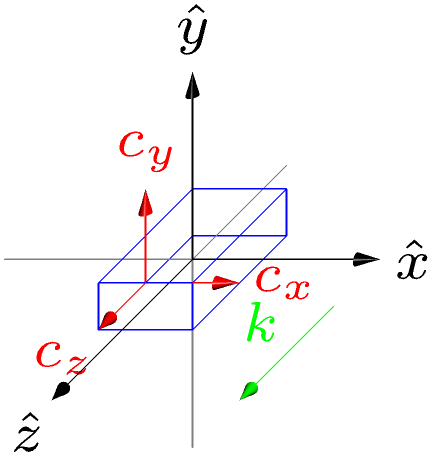

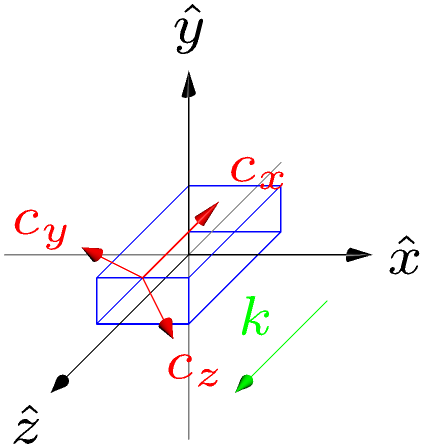

In [71]:
prefa = 'tmp_mata'
prefb = 'tmp_matb'

mat_a.make_crystal_axes_plot(prefa)
mat_b.make_crystal_axes_plot(prefb)

display(Image(prefa+'-crystal.png', width=300))

display(Image(prefb+'-crystal.png', width=300))


Observe that the crystal axes for the first material are in the default orientation aligned with the laboratory axes. The crystal axes for the second material have been rotated as described above. 
The blue box gives a sense of the orientation of the waveguide with propagation out of the screen along $\vec k \propto \hat{z}$.

# Anistropic materials

We now turn to anisotropic materials and consider GaAs which is a cubic material.



In [93]:
mat_gaas = materials.make_material("GaAs_1970_Auld")

print(mat_gaas, '\n')

print(mat_gaas.elastic_properties())

Material: GaAs [100]
  File: GaAs_1970_Auld
  Source: Auld
  Date: 1970 

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Crystal class:  Cubic
  Stiffness c_IJ:
Voigt tensor GaAs_1970_Auld, tensor c:
[[1.188e+11 5.380e+10 5.380e+10 0.000e+00 0.000e+00 0.000e+00]
 [5.380e+10 1.188e+11 5.380e+10 0.000e+00 0.000e+00 0.000e+00]
 [5.380e+10 5.380e+10 1.188e+11 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 5.940e+10 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.940e+10 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.940e+10]]

  Wave mode 1: v_p=4.7313 km/s, u_j=[0. 0. 1.], v_g=[-0.     -0.      4.7313] km/s
  Wave mode 2: v_p=3.3456 km/s, u_j=[1. 0. 0.], v_g=[-0.     -0.      3.3456] km/s
  Wave mode 3: v_p=3.3456 km/s, u_j=[0. 1. 0.], v_g=[-0.     -0.      3.3456] km/s


With the default orientation, the separation into longitudinal and shear modes is simple, and the phase and group velocities are identical.

Things change if we rotate the crystal:

In [111]:
nvec = np.array([1.0,1.0,1.0])
phi = np.pi/3.

mat_gaas2= mat_gaas.copy()

mat_gaas2.rotate(phi, nvec)

print(mat_gaas2.elastic_properties())

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Crystal class:  Cubic
  Stiffness c_IJ:
Voigt tensor GaAs_1970_Auld, tensor c:
[[ 1.5068e+11  3.7859e+10  3.7859e+10  7.9704e+09 -3.9852e+09 -3.9852e+09]
 [ 3.7859e+10  1.5068e+11  3.7859e+10 -3.9852e+09  7.9704e+09 -3.9852e+09]
 [ 3.7859e+10  3.7859e+10  1.5068e+11 -3.9852e+09 -3.9852e+09  7.9704e+09]
 [ 7.9704e+09 -3.9852e+09 -3.9852e+09  4.3459e+10  7.9704e+09  7.9704e+09]
 [-3.9852e+09  7.9704e+09 -3.9852e+09  7.9704e+09  4.3459e+10  7.9704e+09]
 [-3.9852e+09 -3.9852e+09  7.9704e+09  7.9704e+09  7.9704e+09  4.3459e+10]]

  Wave mode 1: v_p=5.3341 km/s,  |v_g|=5.3484 km/s,  u_j=[-0.0400 -0.0400  0.9984],  v_g=[-0.2763 -0.2763  5.3341] km/s
  Wave mode 2: v_p=3.1034 km/s,  |v_g|=3.3219 km/s,  u_j=[ 0.7060  0.7060  0.0565],  v_g=[ 0.8378  0.8378  3.1034] km/s
  Wave mode 3: v_p=2.5860 km/s,  |v_g|=2.6583 km/s,  u_j=[-0.7071  0.7071 -0.0000],  v_g=[-0.4356 -0.4356  2.5860] km/s


Now the phase and group velocities are different and the polarisation vectors point along irregular directions.

We can obtain a much fuller picture by plotting several bulk dispersion properties:

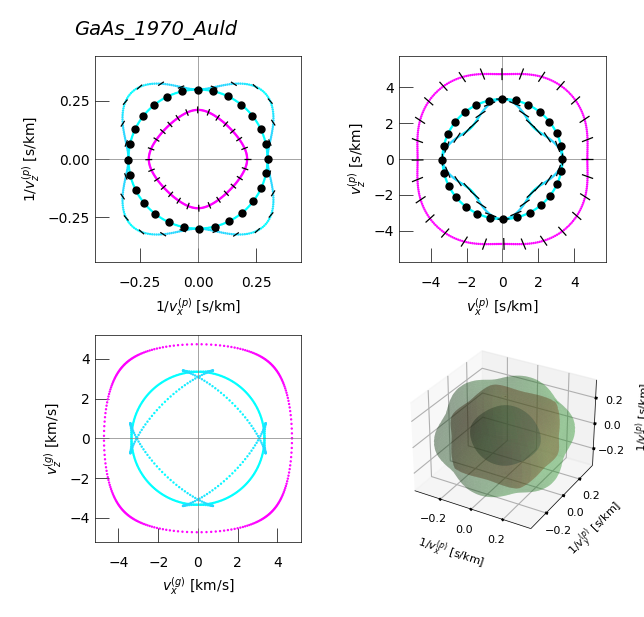

In [115]:
prefix = 'tmpgaas'

mat_gaas.plot_bulk_dispersion(prefix)

#display(Image(prefix+'-bulkdisp.png'))

